## **Module 3: Network Layer**

* **Switching Techniques**
* **Logical Addressing**

  * IPv4
  * IPv6

* **Address Mapping**

  * ARP (Address Resolution Protocol)
  * RARP (Reverse Address Resolution Protocol)
  * BOOTP
  * DHCP (Dynamic Host Configuration Protocol)
* **Delivery, Forwarding & Routing**

  * Unicast Routing Protocols


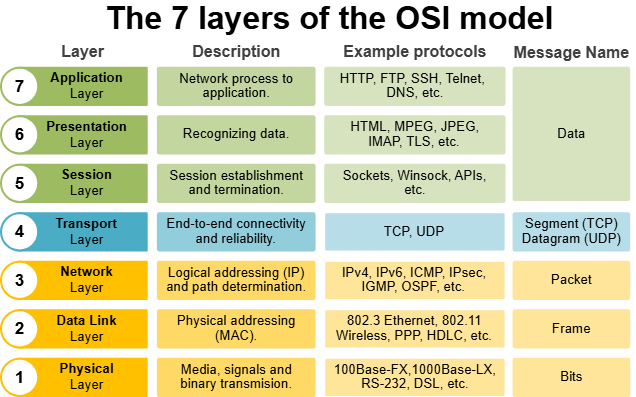


---

# **Module 3: Network Layer**

The **Network Layer** is the third layer of the OSI model.
It is responsible for the **delivery of packets from the source host to the destination host**, possibly across multiple networks.

---

## **1. Functions of the Network Layer**

The main functions are:

1. **Logical Addressing** – Assigning unique IP addresses to identify each device on the network.
2. **Routing** – Determining the best path for data to travel from source to destination.
3. **Packet Forwarding** – Sending packets along the chosen route.
4. **Address Mapping** – Translating between logical (IP) and physical (MAC) addresses.
5. **Fragmentation and Reassembly** – Breaking large packets into smaller fragments if they exceed the MTU (Maximum Transmission Unit).

---

## **2. Address Mapping**

Address mapping is the process of converting between **IP addresses** (logical) and **MAC addresses** (physical).
Since IP is used by the Network Layer and MAC is used by the Data Link Layer, mapping between them is essential for communication.

There are four main protocols used for address mapping:

### **2.1 ARP (Address Resolution Protocol)**

**Purpose:**
To find the MAC address of a device given its IP address.

**When used:**
When a device knows the destination IP but not the MAC address.

**Working Steps:**

1. **ARP Request:**

   * The sender broadcasts an ARP request packet on the LAN asking,
     “Who has IP address X.X.X.X? Tell me your MAC address.”
2. **ARP Reply:**

   * The device with that IP responds with an ARP reply containing its MAC address.
3. **Caching:**

   * The sender stores this IP-MAC pair in its **ARP cache** for future use.

**Example:**

* Host A (IP: 192.168.1.1) wants to send data to Host B (IP: 192.168.1.5).
  It broadcasts: “Who has 192.168.1.5?”
  Host B replies: “192.168.1.5 is at 00:23:9A:12:BC:11.”
  A stores this mapping in its ARP table.

**ARP Packet Format:**

* Hardware Type
* Protocol Type
* Hardware Address Length
* Protocol Address Length
* Operation (Request/Reply)
* Sender Hardware & Protocol Address
* Target Hardware & Protocol Address

**Advantages:**

* Dynamic mapping between IP and MAC addresses
* Automatic discovery of physical addresses

---

### **2.2 RARP (Reverse Address Resolution Protocol)**

**Purpose:**
To find the IP address of a device given its MAC address (reverse of ARP).

**When used:**
Used by **diskless workstations** during booting to know their IP address.

**Working Steps:**

1. The client broadcasts a RARP request containing its MAC address.
2. The **RARP server** checks its table for the corresponding IP address.
3. The server replies with the IP address assigned to that MAC address.

**Limitations:**

* Requires a dedicated RARP server on each network.
* Provides only IP address (no subnet, gateway, etc.).
* Replaced by BOOTP and DHCP.

---

### **2.3 BOOTP (Bootstrap Protocol)**

**Purpose:**
To assign an IP address and other configuration parameters (like subnet mask, gateway, DNS) to diskless clients.

**Improvements over RARP:**

* Works through routers (uses UDP instead of direct broadcast).
* Provides more configuration information.
* Uses **client-server model**.

**Working Steps:**

1. The client broadcasts a BOOTP request using UDP on port 67.
2. The BOOTP server listens on port 67 and replies on port 68 with:

   * Assigned IP address
   * Subnet mask
   * Default gateway
   * DNS server address
   * Boot file name (if needed)

**Disadvantages:**

* Static configuration (manual entry of MAC-IP mapping).
* No automatic reuse of IPs.

---

### **2.4 DHCP (Dynamic Host Configuration Protocol)**

**Purpose:**
To **dynamically assign IP addresses** and configuration parameters to clients automatically.

**Key Features:**

* Dynamic and automatic configuration
* Works through routers
* Can reuse IP addresses (leased for a specific time)

**DHCP Uses UDP Ports:**

* Server → Port 67
* Client → Port 68

**DHCP Operation (4-Step Process):**

1. **DHCP Discover:**
   Client broadcasts a request to find available DHCP servers.

2. **DHCP Offer:**
   Server replies with an available IP address and configuration parameters.

3. **DHCP Request:**
   Client requests to use one of the offered addresses.

4. **DHCP Acknowledgment (ACK):**
   Server confirms the assignment and leases the IP for a specific time.

**Advantages:**

* Fully automatic
* Prevents IP conflicts
* Efficient IP reuse
* No need for manual configuration

---

## **3. Delivery, Forwarding, and Routing**

The Network Layer is responsible for **packet delivery** across networks using forwarding and routing techniques.

---

### **3.1 Delivery**

Delivery is the process of transferring a packet from the **source** to the **destination**.

**Types of Delivery:**

1. **Direct Delivery:**

   * Source and destination are on the same network.
   * Packet is delivered directly using MAC address.
     Example: Two PCs on the same LAN.

2. **Indirect Delivery:**

   * Source and destination are on different networks.
   * Packet must pass through routers (intermediate hops).
     Example: A PC sending data to a remote website.

---

### **3.2 Forwarding**

**Definition:**
Forwarding is the process of sending a packet to the appropriate output link or next hop.

**Forwarding Table:**
Each router maintains a table that maps destination networks to next-hop addresses and output interfaces.

**Forwarding Techniques:**

1. **Next-Hop Method:**
   Table stores the address of the next router.
2. **Network-Specific Method:**
   One entry per network (not per host).
3. **Host-Specific Method:**
   One entry for each host (more precise but larger table).
4. **Default Method:**
   Used when no specific route matches the destination (default gateway).

---

### **3.3 Routing**

Routing is the **decision-making process** that determines the best path from source to destination.

**Goals of Routing:**

* Efficiency (shortest path)
* Reliability
* Load balancing

**Routing Table:**
Each router maintains routing information about known networks and next hops.

---

## **4. Types of Routing**

### **4.1 Static Routing**

* Routes are manually configured by the administrator.
* Does not change automatically.
* Suitable for small, stable networks.

**Advantages:**

* Simple and predictable
* No extra overhead

**Disadvantages:**

* No automatic adaptation to failures
* Not scalable for large networks

---

### **4.2 Dynamic Routing**

* Routers exchange routing information automatically.
* Routes are updated based on network changes.

**Advantages:**

* Automatically adapts to topology changes
* Reduces manual effort

**Disadvantages:**

* More complex
* Requires processing power and bandwidth

---

## **5. Unicast Routing Protocols**

Unicast routing is used when data is sent **from one sender to one receiver**.

Common unicast routing protocols are:

### **5.1 Distance Vector Routing (RIP)**

**Working Principle:**

* Each router periodically shares its routing table with its neighbors.
* Uses **hop count** as the metric (maximum 15 hops).

**Protocol Example:**

* **RIP (Routing Information Protocol)**

**Advantages:**

* Simple and easy to configure

**Disadvantages:**

* Slow convergence
* Routing loops possible

---

### **5.2 Link State Routing (OSPF)**

**Working Principle:**

* Each router builds a complete map of the network.
* Uses **Dijkstra’s algorithm** to compute the shortest path.
* Updates only when a change occurs (more efficient).

**Protocol Example:**

* **OSPF (Open Shortest Path First)**

**Advantages:**

* Fast convergence
* No routing loops
* Scalable

---

### **5.3 Path Vector Routing (BGP)**

**Working Principle:**

* Used between different autonomous systems (AS).
* Each router advertises the complete path information (sequence of AS numbers).

**Protocol Example:**

* **BGP (Border Gateway Protocol)**

**Advantages:**

* Suitable for internet-level routing
* Prevents routing loops

**Disadvantages:**

* Complex configuration

---

### **5.4 Hybrid Routing (EIGRP)**

**Protocol:**

* **EIGRP (Enhanced Interior Gateway Routing Protocol)** developed by Cisco.

**Features:**

* Combines distance vector and link state features.
* Uses multiple metrics: bandwidth, delay, reliability, and load.
* Fast convergence and loop-free operation.

---

## **6. Summary of Module 3**

| Concept    | Purpose                       | Example/Protocol  |
| ---------- | ----------------------------- | ----------------- |
| ARP        | IP → MAC mapping              | LAN communication |
| RARP       | MAC → IP mapping              | Diskless booting  |
| BOOTP      | Static IP configuration       | Server booting    |
| DHCP       | Dynamic IP allocation         | Modern networks   |
| Delivery   | Moving packets                | Direct/Indirect   |
| Forwarding | Sending via correct interface | Next hop          |
| Routing    | Choosing best path            | RIP, OSPF, BGP    |

---



---

## **Module 3: Network Layer**

The **Network Layer** is the **third layer** of the OSI model. It is responsible for **packet forwarding**, including **routing** through different routers. Its main function is to **deliver packets from the source to the destination** across multiple networks.

---

### **Functions of Network Layer**

1. **Logical Addressing**

   * Every device connected to the internet has a **logical address (IP address)**.
   * The network layer adds this IP address to identify the source and destination.
   * Example: IPv4 (32-bit) and IPv6 (128-bit).

2. **Routing**

   * Routing is the process of **selecting the best path** for data to travel from source to destination.
   * It involves routing algorithms and routing tables.

3. **Packet Forwarding**

   * Forwarding is the **actual process of sending the packet** from one router to the next on the path to the destination.

4. **Fragmentation and Reassembly**

   * Sometimes packets are too large for a network’s maximum size (MTU).
   * The network layer breaks it into smaller packets (fragmentation) and reassembles them at the destination.

5. **Error Handling and Congestion Control**

   * Detects errors in packets, prevents congestion, and ensures reliable delivery.

---

## **Address Mapping**

Address mapping converts **logical addresses (IP)** to **physical addresses (MAC)** and vice versa.

The main protocols used for address mapping are:

1. **ARP (Address Resolution Protocol)**
2. **RARP (Reverse Address Resolution Protocol)**
3. **BOOTP (Bootstrap Protocol)**
4. **DHCP (Dynamic Host Configuration Protocol)**

---

### **1. ARP (Address Resolution Protocol)**

**Purpose:**
ARP is used to **map an IP address to its corresponding MAC address** in a local network.

**How it works:**

1. A device wants to send data to another device in the same network.
2. It knows the IP address of the destination but not the MAC address.
3. It broadcasts an **ARP Request** asking, “Who has this IP?”
4. The device with that IP replies with an **ARP Reply** containing its MAC address.
5. The sender stores this mapping in the **ARP Cache** for future use.

**Example:**
Suppose host A (IP: 192.168.1.5, MAC: AA-AA-AA-AA-AA-AA) wants to send data to host B (IP: 192.168.1.10).
A sends an **ARP Request**: “Who has 192.168.1.10?”
B replies: “I do. My MAC address is BB-BB-BB-BB-BB-BB.”
A stores this mapping.

**Diagram (conceptually):**
Host A → (ARP Request) → Broadcast → All devices → Host B (ARP Reply) → Host A stores MAC.

**Important points:**

* Works only within a local network.
* Maintains a cache of recent IP–MAC mappings.
* Defined in RFC 826.

---

### **2. RARP (Reverse Address Resolution Protocol)**

**Purpose:**
RARP is used to **find the IP address of a device** when only the **MAC address** is known.

**How it works:**

1. A diskless computer (without OS or IP) knows only its hardware (MAC) address.
2. It sends a **RARP request** to a RARP server.
3. The server looks up the MAC in its table and sends back the corresponding IP.

**Example:**

* MAC: 08:00:27:4B:9E:12 → IP: 192.168.1.20
* The RARP server responds with the IP address.

**Limitations:**

* Requires a **RARP server** on the same local network.
* Can only provide an IP address (no subnet mask, gateway, etc.).
* Replaced by **BOOTP** and later by **DHCP**.

---

### **3. BOOTP (Bootstrap Protocol)**

**Purpose:**
BOOTP is used to **automatically assign an IP address** to a client computer **during booting**.

**How it works:**

1. A client sends a **BOOTP request** as a broadcast.
2. The **BOOTP server** replies with:

   * IP address
   * Subnet mask
   * Gateway address
   * Boot file (for startup, if needed)

**Advantages over RARP:**

* Works across multiple networks (uses UDP).
* Provides additional information like gateway, subnet mask, and boot file name.
* Doesn’t require a server on the same physical network.

**Ports used:**

* UDP Port 67 (Server)
* UDP Port 68 (Client)

---

### **4. DHCP (Dynamic Host Configuration Protocol)**

**Purpose:**
DHCP is an improved version of BOOTP. It **automatically assigns IP configuration** to clients temporarily or permanently.

**Functions:**

* Assigns IP address, subnet mask, gateway, DNS server, etc.
* Reuses IP addresses dynamically.
* Reduces manual configuration.

**Working Steps (DORA process):**

1. **Discover:** Client broadcasts a DHCP Discover message.
2. **Offer:** DHCP server responds with an IP Offer.
3. **Request:** Client sends a Request to accept the offered IP.
4. **Acknowledge:** Server sends an Acknowledgement confirming the lease.

**Ports used:**

* UDP Port 67 (Server)
* UDP Port 68 (Client)

**IP Lease:**
IP addresses are assigned for a **limited time (lease)** and can be renewed.

**Advantages:**

* Automatic and centralized IP management.
* Prevents conflicts.
* Supports mobility and scalability.

---

## **Delivery, Forwarding & Routing**

### **1. Delivery**

Delivery means sending the packet from the source to the destination.

**Types of Delivery:**

1. **Direct Delivery:**

   * When source and destination are on the **same network**.
   * Example: Two computers connected to the same router.
2. **Indirect Delivery:**

   * When the packet must pass through **routers** to reach another network.

---

### **2. Forwarding**

Forwarding is the process of **sending the packet to the next hop** (router or destination) based on the routing table.

**Forwarding Table Example:**

| Destination Network | Next Hop      | Interface |
| ------------------- | ------------- | --------- |
| 192.168.1.0         | —             | Eth0      |
| 10.0.0.0            | 192.168.2.1   | Eth1      |
| Default             | 192.168.2.254 | Eth2      |

**Forwarding Process:**

* Router receives a packet.
* Checks destination IP.
* Looks up routing table.
* Sends packet to the next hop accordingly.

---

### **3. Routing**

**Definition:**
Routing is the process of **finding the best path** for packets to reach the destination.

**Routing Algorithms:**

1. **Static Routing:**

   * Manually configured routes.
   * Suitable for small networks.
   * Does not adapt to network changes.

2. **Dynamic Routing:**

   * Routers exchange information automatically using routing protocols.
   * Adapts to changes and failures in the network.

**Routing Table:**
A data structure stored in routers to keep track of possible routes.

---

## **Unicast Routing Protocols**

These protocols are used for **one-to-one communication**, where a packet is sent from one source to one destination.

**Common Unicast Routing Protocols:**

1. **RIP (Routing Information Protocol):**

   * Distance Vector Routing Protocol.
   * Uses **hop count** as a metric.
   * Max hops allowed: **15**.
   * Uses **UDP port 520**.
   * Updates every 30 seconds.

2. **OSPF (Open Shortest Path First):**

   * Link State Routing Protocol.
   * Uses **Dijkstra’s algorithm** to find the shortest path.
   * Supports large networks.
   * Updates only when there’s a change.

3. **BGP (Border Gateway Protocol):**

   * Used between **autonomous systems (AS)**.
   * Path Vector Protocol.
   * Core protocol of the Internet.
   * Ensures efficient global routing.

4. **IGRP / EIGRP (Cisco Proprietary):**

   * Advanced distance vector protocols.
   * Used in Cisco-based networks.

---

## **Summary of Module 3**

| Topic                     | Description                             |
| ------------------------- | --------------------------------------- |
| ARP                       | Maps IP → MAC                           |
| RARP                      | Maps MAC → IP                           |
| BOOTP                     | Assigns IP + configuration during boot  |
| DHCP                      | Dynamic IP allocation with DORA process |
| Delivery                  | Direct or Indirect transfer of packets  |
| Forwarding                | Sends packet to next hop                |
| Routing                   | Finds best path for delivery            |
| Unicast Routing Protocols | RIP, OSPF, BGP, etc.                    |

---